In [1]:
pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

In [2]:
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import scipy

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.58843184 0.57666713 0.6433338 ]
  [0.5886401  0.5768754  0.64354205]
  [0.58884823 0.5770835  0.6437502 ]
  ...
  [0.71351796 0.7213611  0.7723415 ]
  [0.7079857  0.71582884 0.7668092 ]
  [0.67549235 0.6833355  0.7343159 ]]

 [[0.59567446 0.58390975 0.6505764 ]
  [0.59525794 0.58349323 0.65015996]
  [0.5948415  0.5830768  0.64974344]
  ...
  [0.7133097  0.72115284 0.77213323]
  [0.7061116  0.71395475 0.7649352 ]
  [0.67653346 0.6843766  0.735357  ]]

 [[0.5923645  0.5805998  0.64726645]
  [0.5925727  0.580808   0.6474747 ]
  [0.5927809  0.5810162  0.64768285]
  ...
  [0.71310157 0.7209447  0.7719251 ]
  [0.70423764 0.7120808  0.76306117]
  [0.6775746  0.6854177  0.7363981 ]]

 ...

 [[0.45502722 0.44326252 0.48639977]
  [0.49660513 0.48484042 0.52797765]
  [0.52896523 0.5172005  0.5603378 ]
  ...
  [0.6011565  0.6011565  0.64037216]
  [0.60469633 0.60469633 0.643912  ]
  [0.60823625 0.60823625 0.64745194]]

 [[0.45232025 0.44055554 0.48369282]
  [0.49972853 0.48796383 0.5311011 ]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse")

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7384433  0.7266786  0.7541296 ]
  [0.7456608  0.7338961  0.76134706]
  [0.7490196  0.7372549  0.76470596]
  ...
  [0.6944011  0.67479324 0.69832265]
  [0.69960505 0.6799972  0.7035266 ]
  [0.68770015 0.6680923  0.6916217 ]]

 [[0.73745126 0.72568655 0.7531375 ]
  [0.74516475 0.73340005 0.760851  ]
  [0.7490196  0.7372549  0.76470596]
  ...
  [0.6181483  0.5985405  0.6220699 ]
  [0.6098429  0.59023505 0.61376446]
  [0.6247241  0.6051162  0.62864566]]

 [[0.73685706 0.72509235 0.75254333]
  [0.74423933 0.7324746  0.7599256 ]
  [0.74855876 0.73679405 0.76424503]
  ...
  [0.7116639  0.69205606 0.7155855 ]
  [0.7241893  0.70458144 0.72811085]
  [0.7058359  0.68622804 0.70975745]]

 ...

 [[0.6384813  0.63455975 0.69730484]
  [0.63550514 0.6315836  0.69432867]
  [0.6334506  0.62952906 0.6922742 ]
  ...
  [0.44312906 0.45489377 0.5137173 ]
  [0.5144128  0.5261775  0.58500105]
  [0.6097181  0.6210849  0.67990845]]

 [[0.62185866 0.6179371  0.6806822 ]
  [0.61987454 0.61595297 0.67869806]


In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='linear'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [15]:
scipy = True

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)
# logits = model(train_ds)
# f_x = tf.nn.softmax(logits)

Epoch 1/20
47/47 [==============================] - 139s 2s/step - loss: 0.8883 - accuracy: 0.5081 - val_loss: 0.8552 - val_accuracy: 0.5365
Epoch 2/20
47/47 [==============================] - 54s 1s/step - loss: 0.7735 - accuracy: 0.6418 - val_loss: 0.7138 - val_accuracy: 0.7500
Epoch 3/20
47/47 [==============================] - 49s 1s/step - loss: 0.5878 - accuracy: 0.7490 - val_loss: 0.5234 - val_accuracy: 0.7552
Epoch 4/20
47/47 [==============================] - 48s 1s/step - loss: 0.4853 - accuracy: 0.7931 - val_loss: 0.7781 - val_accuracy: 0.6562
Epoch 5/20
47/47 [==============================] - 47s 1s/step - loss: 0.4155 - accuracy: 0.8229 - val_loss: 0.3504 - val_accuracy: 0.8906
Epoch 6/20
47/47 [==============================] - 44s 919ms/step - loss: 0.2442 - accuracy: 0.9084 - val_loss: 0.1626 - val_accuracy: 0.9531
Epoch 7/20
47/47 [==============================] - 61s 1s/step - loss: 0.1792 - accuracy: 0.9328 - val_loss: 0.0977 - val_accuracy: 0.9740
Epoch 8/20
47/47

In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 23s 2s/step - loss: 0.0470 - accuracy: 0.9791


In [18]:
scores

[0.04700067639350891, 0.9791183471679688]

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

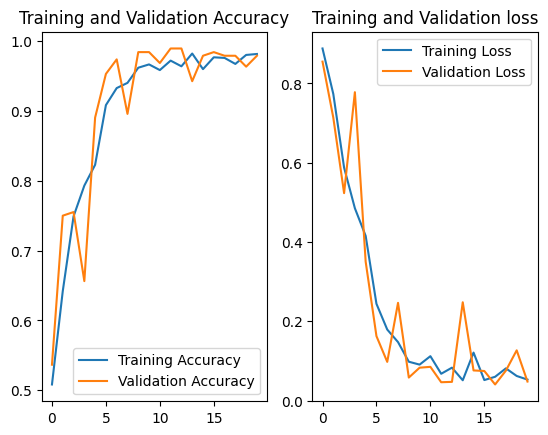

In [24]:
EPOCHS =20
plt.figure(figure=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 526ms/step
predicted label: Potato___Early_blight


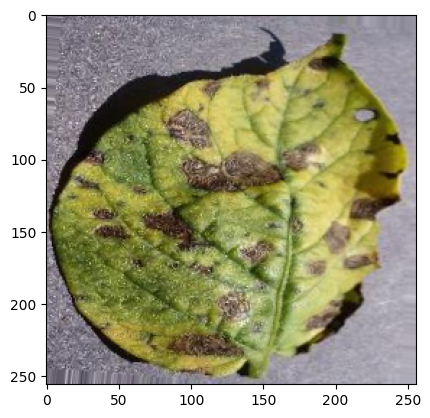

In [27]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = tf.nn.softmax(model.predict(img_array))

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 70ms/step


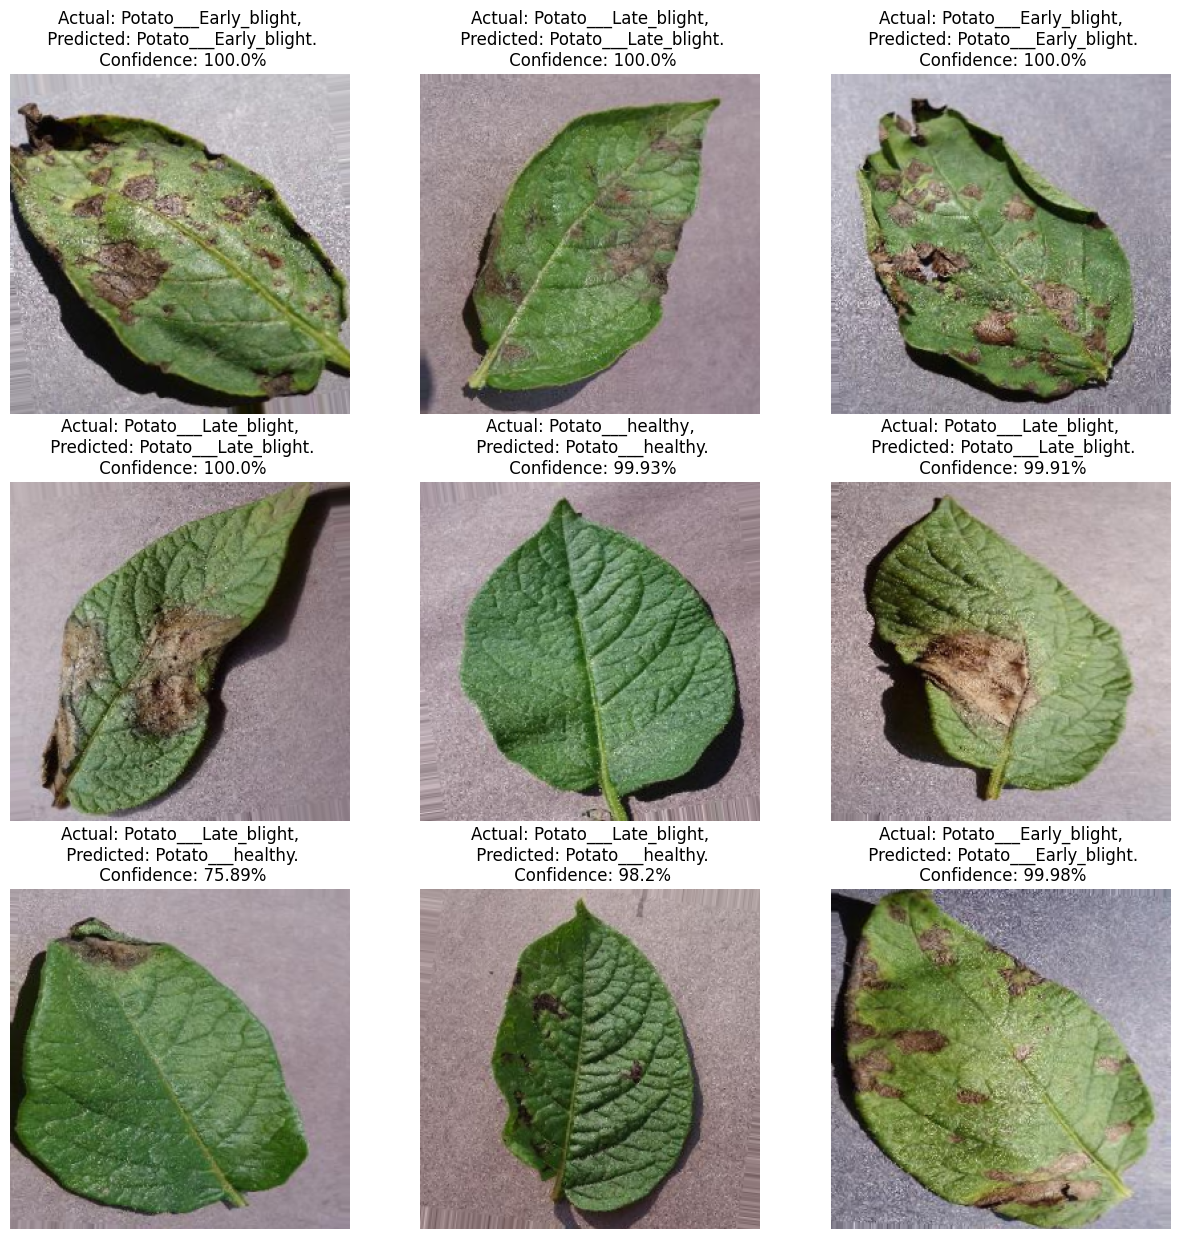

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [32]:
model.save("../potatoes.h5")